# About the dataset

### Columns in the Dataset:

1.  **Duration**:
    
    -   **Meaning**: This column represents the duration of some activity (e.g., exercise or workout) in minutes.
    -   **Units**: Minutes
    -   **Explanation**: It shows how long the activity lasted (e.g., 60 minutes, 45 minutes, etc.). In this dataset, the activity duration seems to be consistent at 60 minutes for some rows and 45 minutes for others.
2.  **Pulse**:
    
    -   **Meaning**: This column represents the **average heart rate** during the activity.
    -   **Units**: Beats per minute (bpm)
    -   **Explanation**: It shows the average heart rate while performing the activity. For example, if the pulse is 110, it means the average heart rate during that activity was 110 bpm.
3.  **Maxpulses**:
    
    -   **Meaning**: This column represents the **maximum heart rate** recorded during the activity.
    -   **Units**: Beats per minute (bpm)
    -   **Explanation**: This is the highest heart rate reached during the activity. For example, if the maximum pulse is 130, the highest heart rate observed was 130 bpm.
4.  **Calories** (Target Value):
    
    -   **Meaning**: This column represents the **number of calories burned** during the activity.
    -   **Units**: Calories
    -   **Explanation**: It shows how many calories were burned during the activity, depending on the duration, pulse, and intensity of the activity.### Columns in the Dataset:

### Target variable:

-   **Target Variable**: **Calories** (the number of calories burned)

# 1. Data Loading and Exploration

In [137]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv("./Datasets/dataset1.csv")

In [140]:
df.head()

,Duration,Pulse,Maxpulses,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [141]:
df.shape

(169, 4)

In [142]:
np.array(df.columns)

array(['Duration', 'Pulse', 'Maxpulses', 'Calories'], dtype=object)

In [143]:
df.dtypes

Duration       int64
Pulse          int64
Maxpulses      int64
Calories     float64
dtype: object

In [144]:
df.describe()

,Duration,Pulse,Maxpulses,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.800000
std,42.299949,14.510259,16.450434,266.377134
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Duration   169 non-null    int64  
 1   Pulse      169 non-null    int64  
 2   Maxpulses  169 non-null    int64  
 3   Calories   164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


## i) Null values

In [146]:
df.isnull().sum()

Duration     0
Pulse        0
Maxpulses    0
Calories     5
dtype: int64

In [147]:
null_df = df.loc[df['Calories'].isnull()]

null_idx_calories = null_df.index

null_df

,Duration,Pulse,Maxpulses,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


#### Handling Null values

In [148]:
numerical_features = df.select_dtypes(include = [np.number])
num_cols = numerical_features.columns
num_cols

Index(['Duration', 'Pulse', 'Maxpulses', 'Calories'], dtype='object')

In [149]:
mean_values = df[num_cols].mean()
median_values = df[num_cols].median()
std_values = df[num_cols].std()
quartiles = df[num_cols].quantile([0.25, 0.5, 0.75])

print (mean_values)
print (median_values)
print (std_values)
print (quartiles)

Duration      63.846154
Pulse        107.461538
Maxpulses    134.047337
Calories     375.800000
dtype: float64
Duration      60.0
Pulse        105.0
Maxpulses    131.0
Calories     318.6
dtype: float64
Duration      42.299949
Pulse         14.510259
Maxpulses     16.450434
Calories     266.377134
dtype: float64
      Duration  Pulse  Maxpulses  Calories
0.25      45.0  100.0      124.0   250.925
0.50      60.0  105.0      131.0   318.600
0.75      60.0  111.0      141.0   387.600


In [150]:
# can use fillna or dropna

#df = df.dropna(subset = ['Calories'])

df = df.fillna({'Calories' : df['Calories'].mean()})

In [151]:
# Using .loc[] with specific index labels
df.loc[null_idx_calories]  # Returns the rows with those specific labels

,Duration,Pulse,Maxpulses,Calories
17,45,90,112,375.8
27,60,103,132,375.8
91,45,107,137,375.8
118,60,105,125,375.8
141,60,97,127,375.8


# 2. Feature Analysis:

           Duration     Pulse  Maxpulses  Calories
Duration   1.000000 -0.155408   0.009403  0.922721
Pulse     -0.155408  1.000000   0.786535  0.025120
Maxpulses  0.009403  0.786535   1.000000  0.203814
Calories   0.922721  0.025120   0.203814  1.000000
------------------------------------------------------------


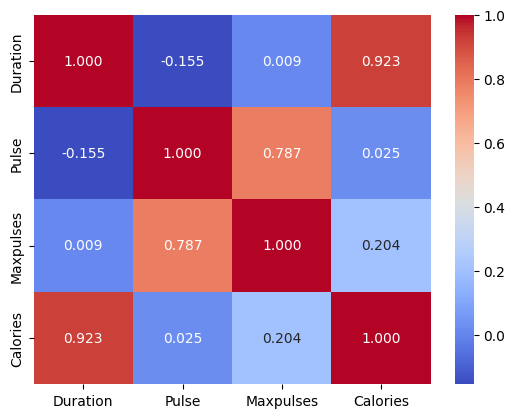

In [152]:
corr_matrix = numerical_features.corr()
print(corr_matrix)
print ('-' * 60)

#Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.show() 


##### Key Insights:
Correlation between Duration and Calories:

0.922721 is a strong positive correlation. This suggests that as the Duration of exercise increases, the Calories burned also tend to increase. This is expected: longer duration activities generally burn more calories.
Correlation between Pulse and Maxpulses:

0.786535 is a moderate positive correlation. This suggests that there is a significant relationship between Pulse and Maxpulses. As pulse rate increases, max pulse also tends to increase.
Correlation between Duration and Pulse:

-0.155408 indicates a weak negative correlation. This means that there is no strong relationship between Duration and Pulse — in fact, in this data, as Duration increases, Pulse tends to decrease very slightly, but the relationship is weak, so it's not a major factor.
Correlation between Maxpulses and Calories:

0.203814 is a weak positive correlation. This suggests a very weak relationship between Maxpulses and Calories burned, but the effect is small. This is not as strong a predictor for calories burned as Duration.
Other observations:

The correlation between Pulse and Calories is very weak (0.025120), suggesting that Pulse rate has little to no impact on Calories burned, at least in the context of this data.

# 3. Data Visualization:
- Create histograms for at least 5 numerical features to understand their
distribution.
- Create box plots for the same 5 features to identify outliers.
- Visualize the relationship between the target variable and a few key features
using scatter plots or bar charts.

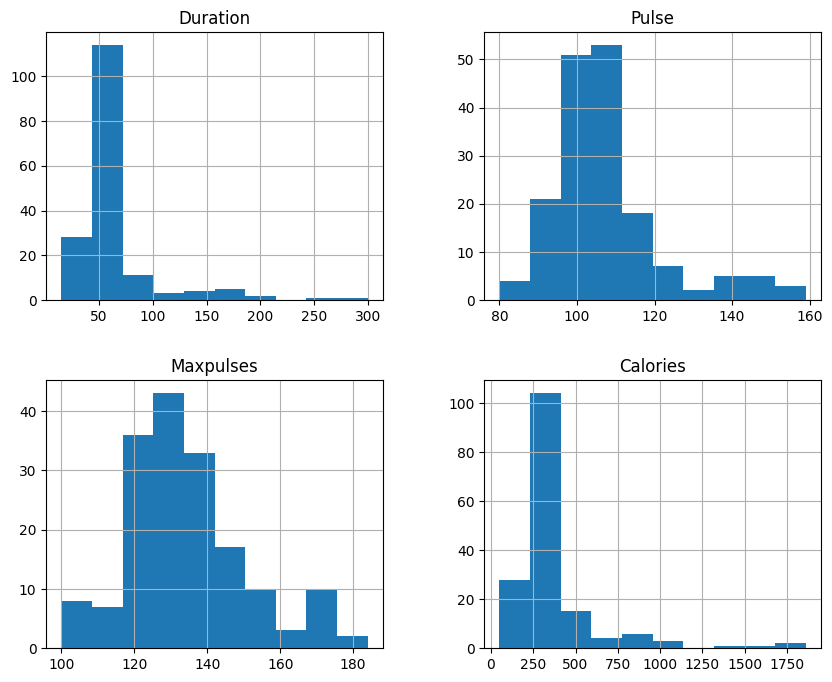

In [153]:
# Histograms
numerical_features.hist(figsize=(10,8))
# sns.pairplot(numerical_features)
plt.show()

# 4. Feature Engineering:


In [154]:
# df['Duration_Pulse_Interaction'] = df['Duration'] * df['Pulse']
# df['Pulse_Intensity_Ratio'] = df['Pulse'] / df['Maxpulses']
df_original = df.copy()

# 5. OUTLIER REMOVAL:

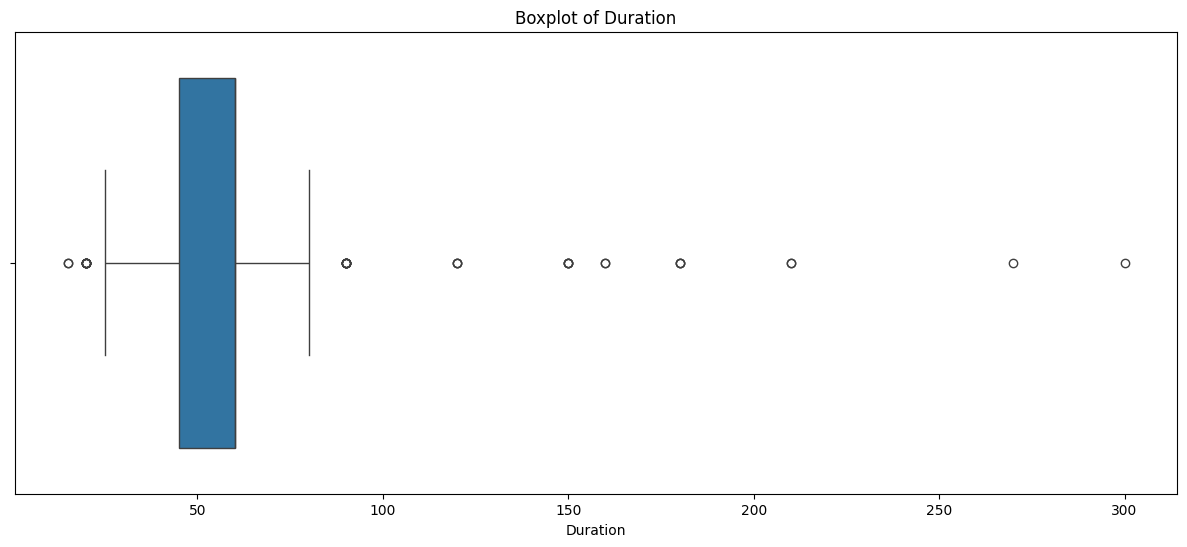

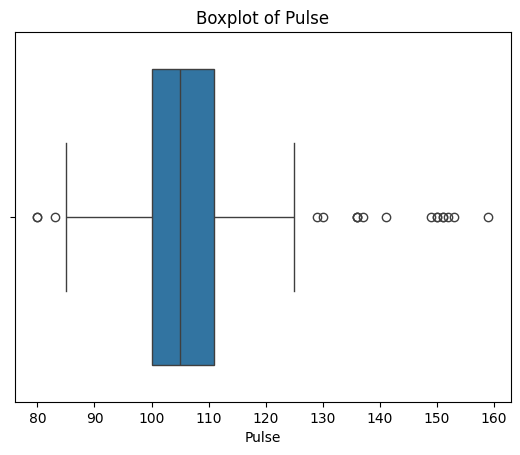

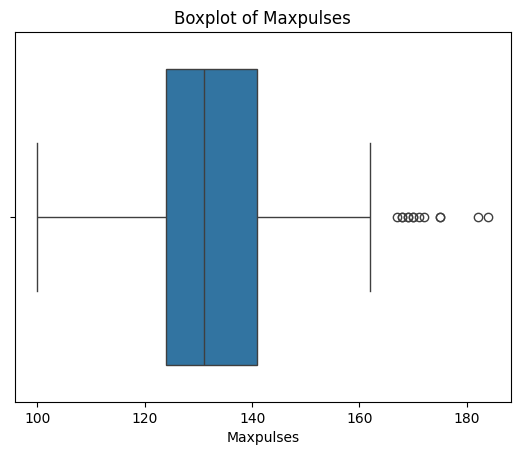

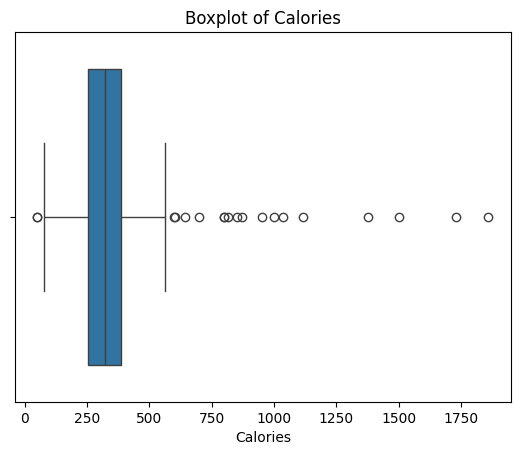

In [156]:
def show_boxplot(df, numerical_features):
    
    plt.figure(figsize=(15, 6))  
    for i, col in enumerate(numerical_features):
        # plt.subplot(1, len(numerical_features), i+1)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

show_boxplot(df, numerical_features)

In [157]:
from scipy import stats
z_scores = np.abs(stats.zscore(df))
z_scores

,Duration,Pulse,Maxpulses,Calories
0,0.091196,0.175462,0.246763,0.127291
1,0.091196,0.659313,0.667776,0.394487
2,0.091196,0.308389,0.058083,0.136847
3,0.446860,0.106341,2.496856,0.357026
4,0.446860,0.659313,0.850684,0.115441
...,...,...,...,...
164,0.091196,0.170145,0.362930,0.324916
165,0.091196,0.175462,0.667776,0.288220
166,0.091196,0.521070,0.667776,0.250759
167,0.264468,0.866678,0.972623,0.211769


In [158]:
df = df[(z_scores<3).all(axis=1)]

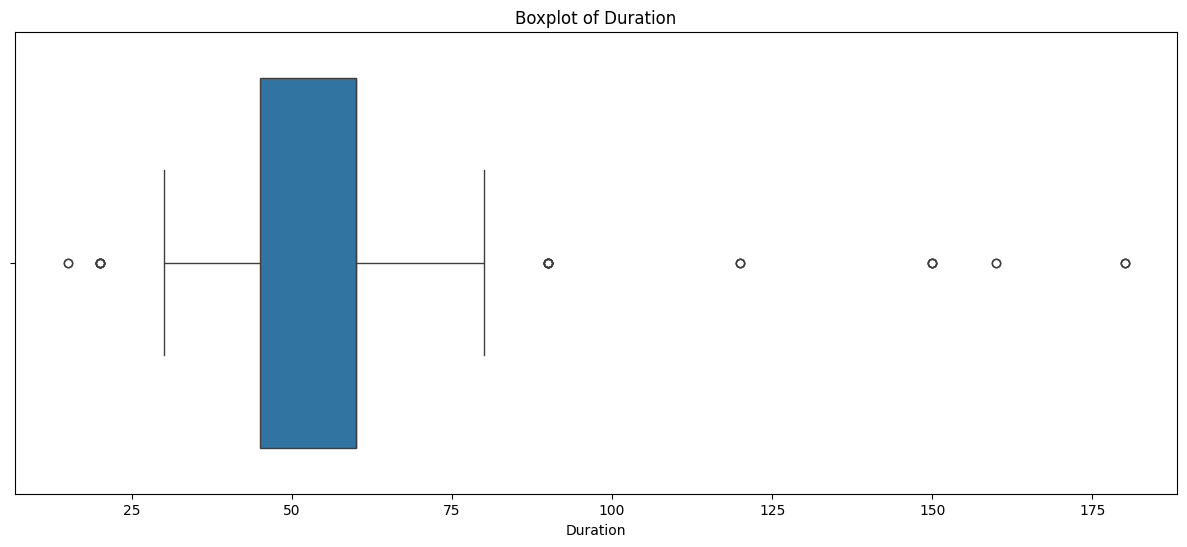

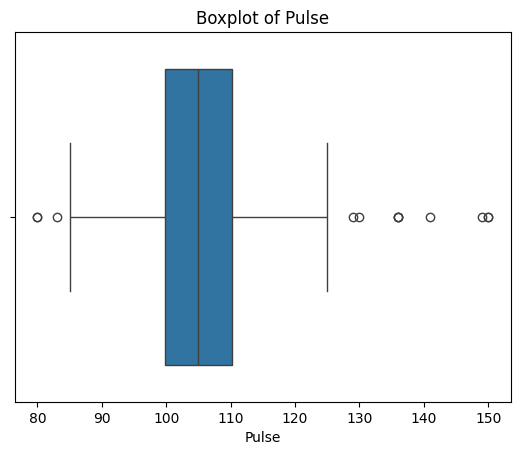

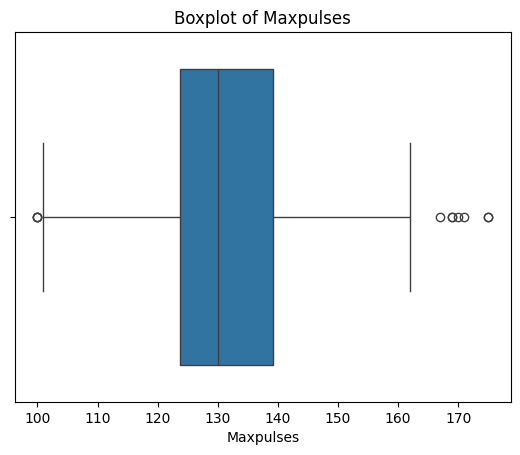

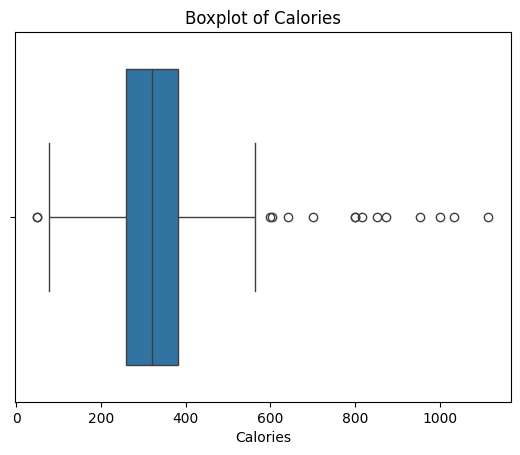

In [159]:
show_boxplot(df, numerical_features)

In [160]:
def remove_outliers(df, columns):
    """
    Removes outliers from specified columns in a DataFrame using the IQR method.
    
    Parameters:
    - df: DataFrame, The input DataFrame containing the data
    - columns: List of column names to check for outliers
    
    Returns:
    - DataFrame with outliers removed
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_cleaned = df.copy()
    
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds for the acceptable data
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned

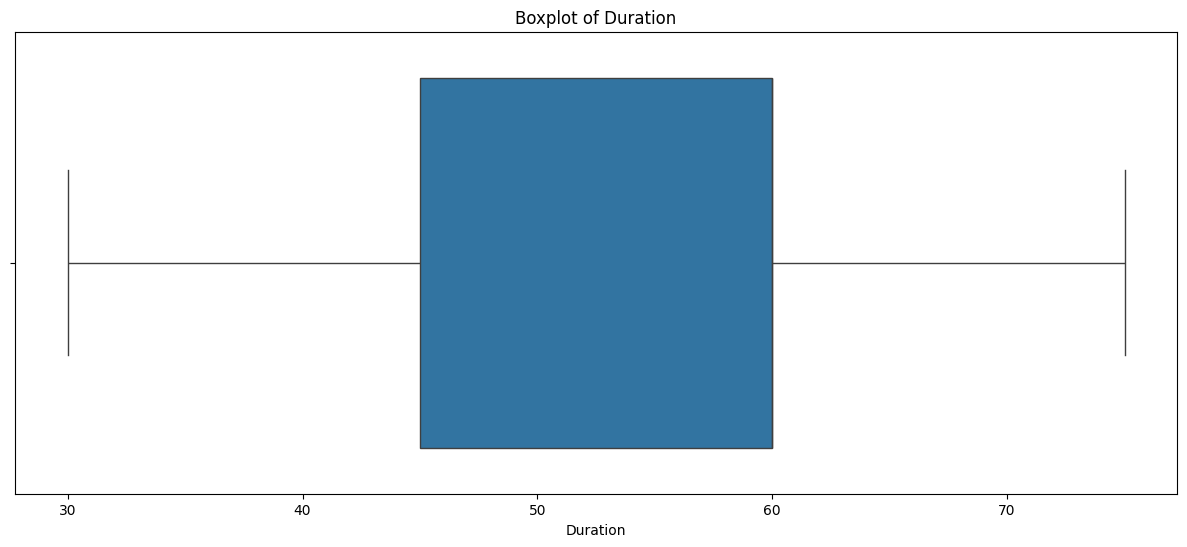

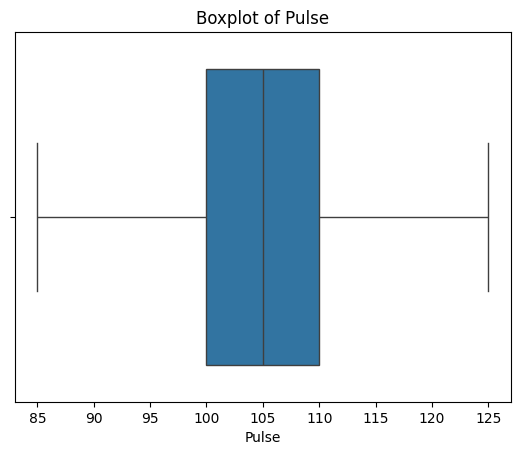

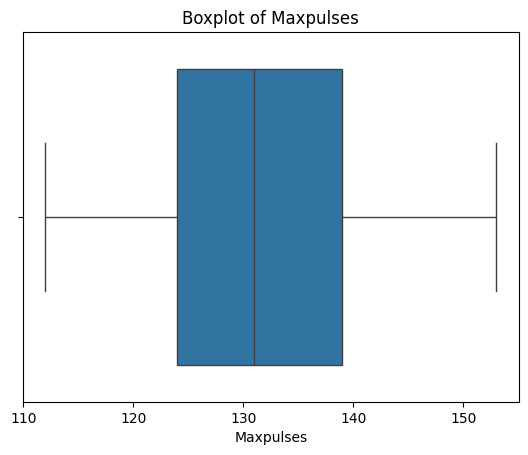

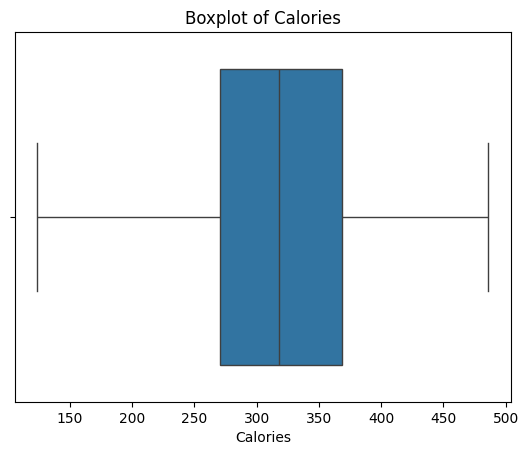

In [161]:
df_cleaned = remove_outliers(df, numerical_features)

show_boxplot(df_cleaned, numerical_features)

# 6. Frequency Distribution

In [164]:
freq  = numerical_features.value_counts()
freq

Duration  Pulse  Maxpulses  Calories
60        102    127        300.5       2
          109    153        387.6       2
          111    151        368.5       2
          100    120        300.0       2
45        100    120        225.3       2
                                       ..
          118    141        341.0       1
          122    149        335.4       1
          123    152        321.0       1
          129    103        242.0       1
300       108    143        1500.2      1
Name: count, Length: 158, dtype: int64

In [166]:
#freq.plot(kind='pie', color='skyblue')
# plt.title('Frequency Distribution of Channel')
# plt.xlabel('Channel')
# plt.ylabel('Frequency')
# plt.show()

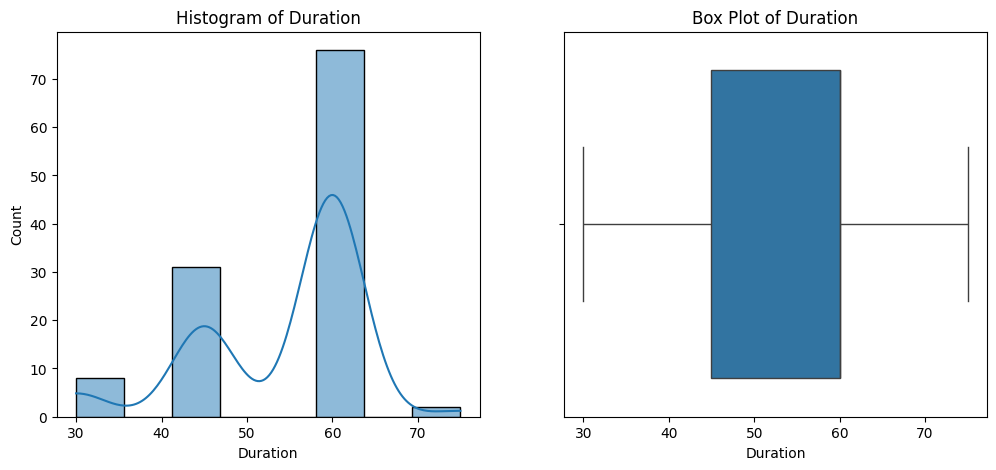

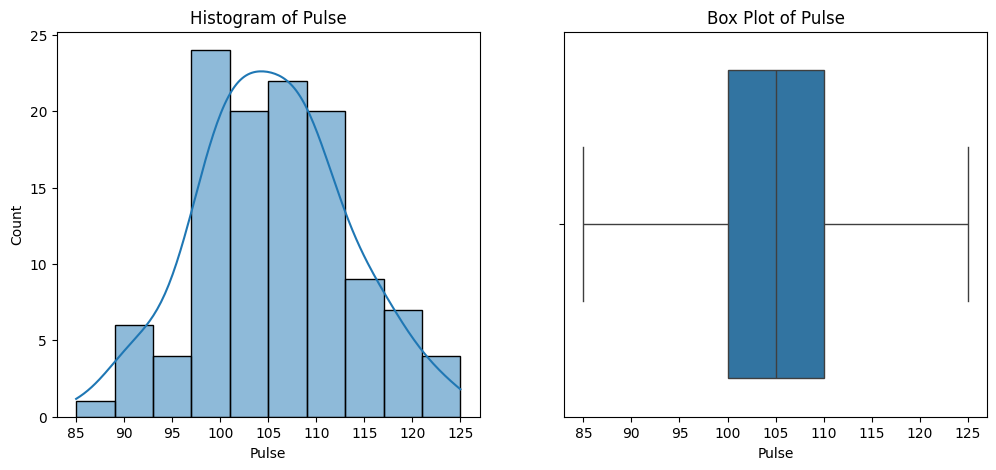

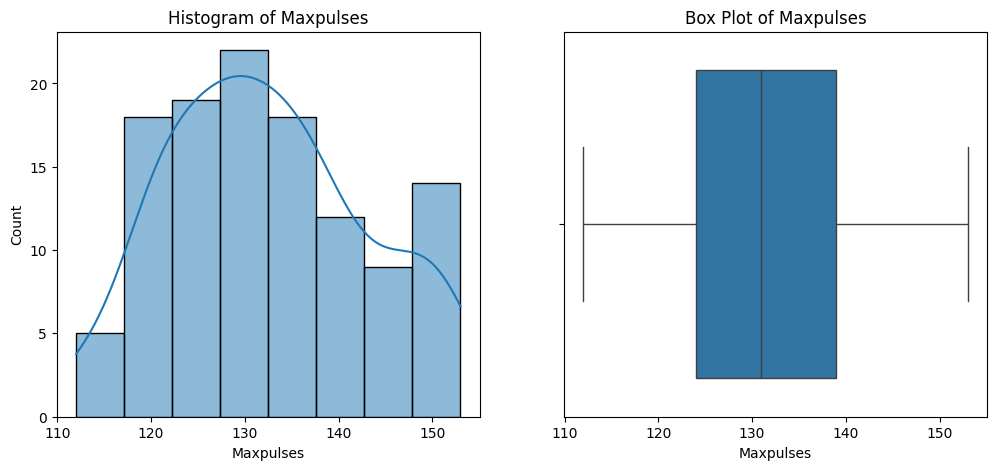

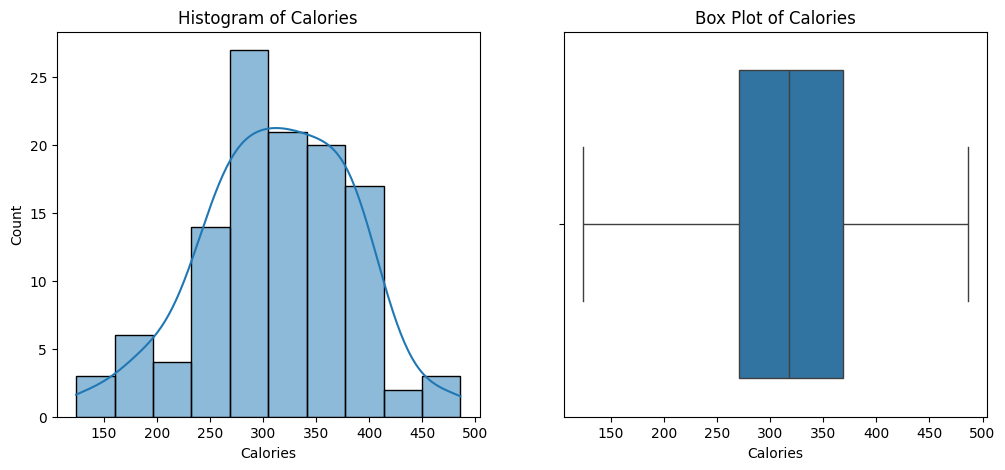

In [169]:
def plot_distributions(df, columns):
    for col in columns:
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}')
        
        plt.show()

plot_distributions(df_cleaned, num_cols)

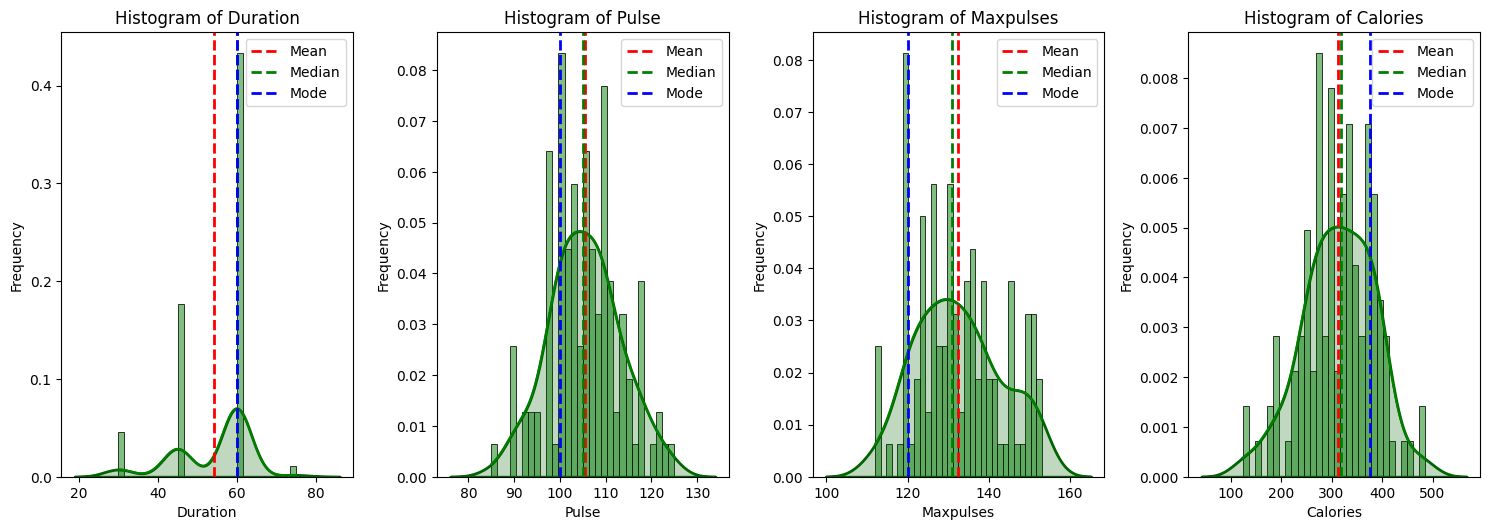

In [173]:
def show_dist(df, num_cols):
    plt.figure(figsize=(15, 10))
    
    for i, column in enumerate(num_cols):
        plt.subplot(2, len(num_cols), i+1)
    
        # Calculate mean, median, and mode
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode()[0]
    
        sns.histplot(df[column], bins=30, kde=True,
                     color='green',stat='density')
    
        sns.kdeplot(df[column], fill=True, color='darkgreen', linewidth=2)
    
        plt.axvline(mean, color='red', linestyle='dashed',
                    linewidth=2, label='Mean')
        plt.axvline(median, color='green', linestyle='dashed',
                    linewidth=2, label='Median')
        plt.axvline(mode, color='blue', linestyle='dashed',
                    linewidth=2, label='Mode')
    
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

show_dist(df_cleaned, num_cols)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1000 with 0 Axes>

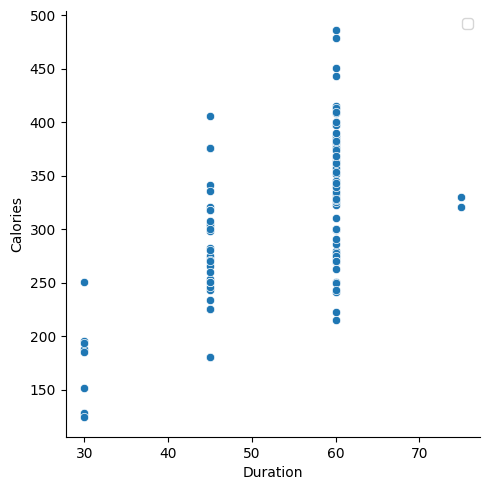

In [176]:
def scatter_plt(df):
    plt.figure(figsize=(15,10))

    sns.relplot(kind='scatter', x='Duration', y='Calories', data=df)

    plt.legend()
    plt.show()

scatter_plt(df_cleaned)

# 7.Normalization

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


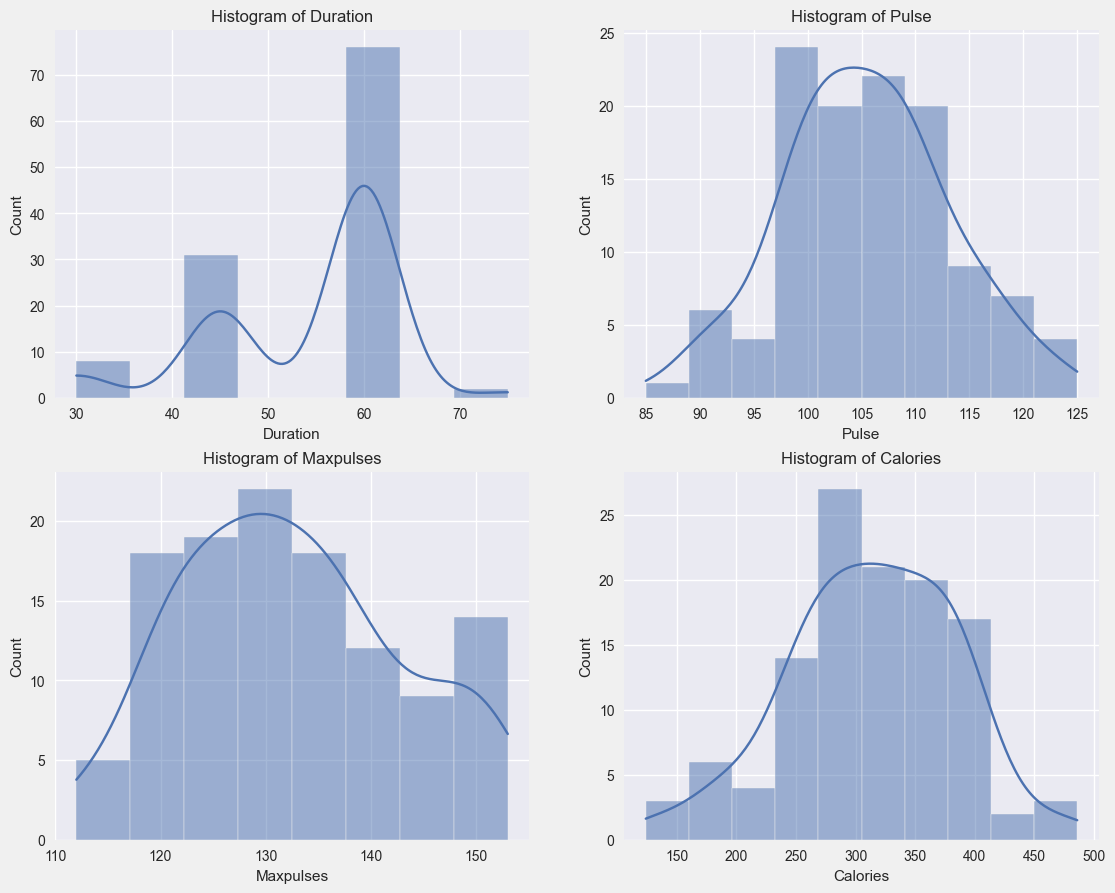

In [190]:
plt.figure(figsize=(12, 10))
print(plt.style.available)

plt.style.use('seaborn-v0_8')
for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(kde=True, data = df_cleaned, x=col)
    plt.title(f'Histogram of {col}')
plt.show()

### 1.Min Max Normalization 

In [192]:
# 1) Min-Max Normalization
def min_max_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

# Apply normalization to each column
df_normalized_1 = df_cleaned.apply(min_max_normalize)

print("Min-Max Normalized Data:\n")
df_normalized_1 

Min-Max Normalized Data:



,Duration,Pulse,Maxpulses,Calories
0,0.666667,0.625,0.439024,0.787569
1,0.666667,0.800,0.804878,0.980663
2,0.666667,0.450,0.560976,0.596685
4,0.333333,0.800,0.878049,0.779006
5,0.666667,0.425,0.365854,0.487569
...,...,...,...,...
164,0.666667,0.500,0.682927,0.460773
165,0.666667,0.625,0.804878,0.487293
166,0.666667,0.750,0.804878,0.514365
167,1.000000,0.875,0.926829,0.542541


### 2.Z-score Normalization  (standardization)

In [194]:
# 2) Z-score Normalization
def zscore_normalize(data):
    return (data - data.mean()) / data.std()

# Apply normalization to each column
df_normalized_2 = df_cleaned.apply(zscore_normalize)

print("Z-score Normalized Data:\n")
df_normalized_2

Z-score Normalized Data:



,Duration,Pulse,Maxpulses,Calories
0,0.599835,0.595608,-0.231865,1.350523
1,0.599835,1.495614,1.195938,2.340092
2,0.599835,-0.304397,0.244069,0.372279
4,-0.959735,1.495614,1.481498,1.306636
5,0.599835,-0.432970,-0.517426,-0.186920
...,...,...,...,...
164,0.599835,-0.047253,0.720003,-0.324242
165,0.599835,0.595608,1.195938,-0.188336
166,0.599835,1.238469,1.195938,-0.049598
167,2.159404,1.881330,1.671872,0.094803


In [211]:
#FLATTEN DATA:

df_flatten = df_normalized_1.to_numpy().flatten()
df_flatten


array([0.66666667, 0.625     , 0.43902439, 0.78756906, 0.66666667,
       0.8       , 0.80487805, 0.98066298, 0.66666667, 0.45      ,
       0.56097561, 0.59668508, 0.33333333, 0.8       , 0.87804878,
       0.77900552, 0.66666667, 0.425     , 0.36585366, 0.48756906,
       0.66666667, 0.625     , 0.58536585, 0.69060773, 0.33333333,
       0.475     , 0.53658537, 0.35718232, 0.        , 0.6       ,
       0.51219512, 0.19640884, 0.66666667, 0.325     , 0.29268293,
       0.40055249, 0.66666667, 0.45      , 0.85365854, 0.56712707,
       0.66666667, 0.375     , 0.19512195, 0.35      , 0.66666667,
       0.525     , 0.3902439 , 0.61132597, 0.66666667, 0.475     ,
       0.48780488, 0.70524862, 0.66666667, 0.325     , 0.26829268,
       0.41712707, 0.66666667, 0.325     , 0.19512195, 0.2519337 ,
       0.66666667, 0.375     , 0.19512195, 0.48618785, 0.33333333,
       0.125     , 0.        , 0.69558011, 0.66666667, 0.45      ,
       0.26829268, 0.54972376, 0.33333333, 0.3       , 0.31707

### Shapiro Wilk Test

In [212]:
from scipy.stats import shapiro,kstest

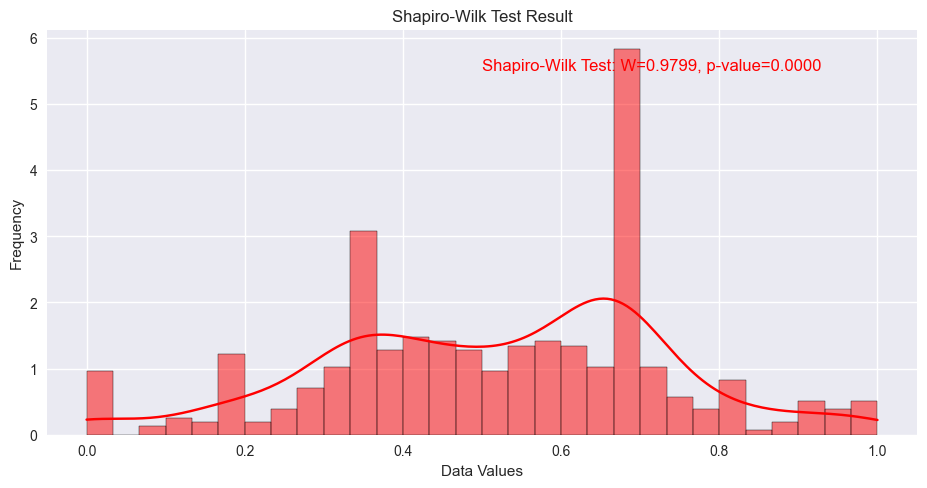

In [213]:
# Perform Shapiro-Wilk test
shapiro_test = shapiro(df_normalized_2)

# Plot the histogram with annotation
plt.figure(figsize=(10, 5))
sns.histplot(data = df_flatten, bins=30, kde=True, color='r', edgecolor='black', stat='density', alpha=0.5)
plt.title('Shapiro-Wilk Test Result')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

p_value_text = f'Shapiro-Wilk Test: '
p_value_text += f'W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}'
plt.annotate(p_value_text, xy=(0.5, 0.9),
             xycoords='axes fraction', fontsize=12, color='red')

plt.show()

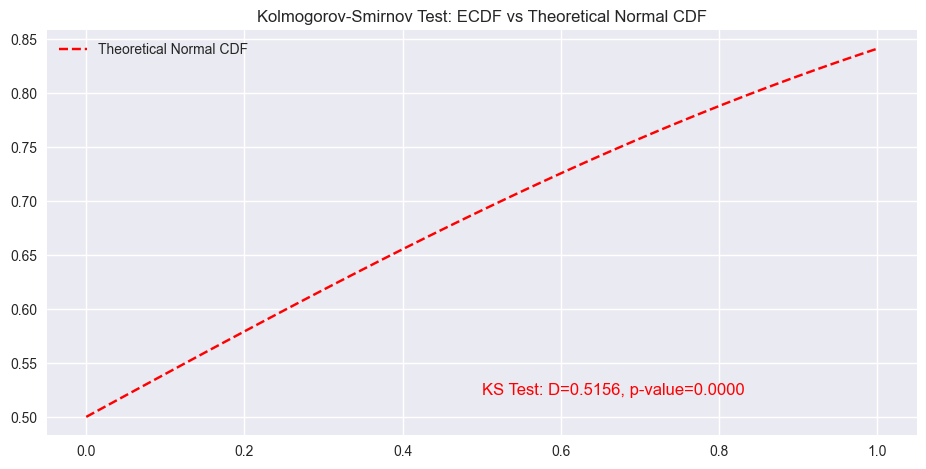

In [214]:
from scipy.stats import kstest, norm
# from statsmodels.distributions.empirical_distribution import ECDF

# Perform Kolmogorov-Smirnov test
ks_test = kstest(df_flatten, 'norm')

# Generate theoretical normal distribution CDF
x = np.linspace(np.min(df_flatten),
                np.max(df_flatten), 100)
cdf_theoretical = norm.cdf(x)

# ecdf = ECDF(df_flatten)
plt.figure(figsize=(10, 5))
# plt.plot(ecdf.x, ecdf.y, label='ECDF of Data')
plt.plot(x, cdf_theoretical, label='Theoretical Normal CDF',
         linestyle='--', color='red')
plt.title('Kolmogorov-Smirnov Test: ECDF vs Theoretical Normal CDF')

ks_text = f'KS Test: D={ks_test[0]:.4f}, '
ks_text += f'p-value={ks_test[1]:.4f}'
plt.annotate(ks_text, xy=(0.5, 0.1),
             xycoords='axes fraction', fontsize=12, color='red')

plt.legend()
plt.show()

### QQ plot and Histograms

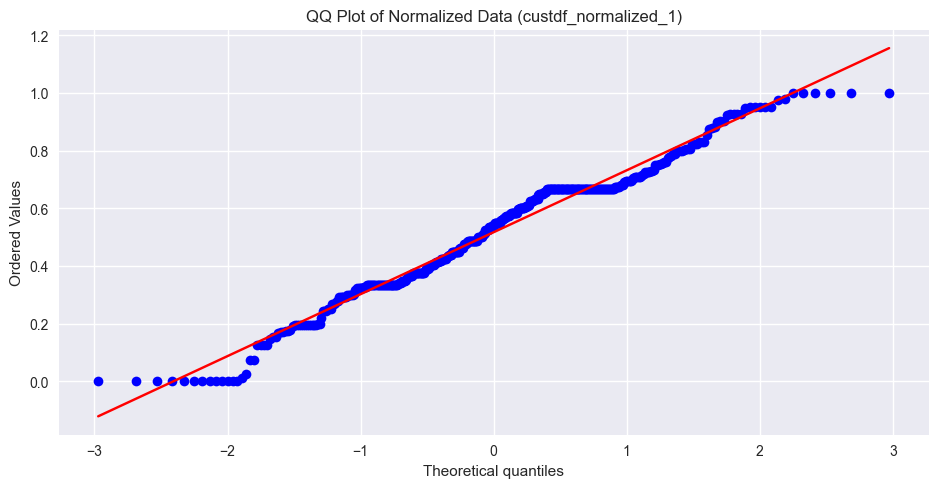

In [215]:
#QQ plot for the normalized dataset

plt.figure(figsize=(10, 5))
stats.probplot(df_flatten, dist="norm", plot=plt)
plt.title('QQ Plot of Normalized Data (custdf_normalized_1)')
plt.show()

## inference:

- As p value is less than 0.05 it is not normalized.
- Also from QQ plot and Histograms - not normalized.

In [216]:
#Applying transformations

# Apply Logarithmic transformation (only for strictly positive data)
cust_log = np.log1p(df_normalized_1)

# Box-Cox transformation (must ensure all data is positive)
cust_bc, _ = stats.boxcox(df_flatten + 1e-6)
# Adding a small constant to handle non-positive values

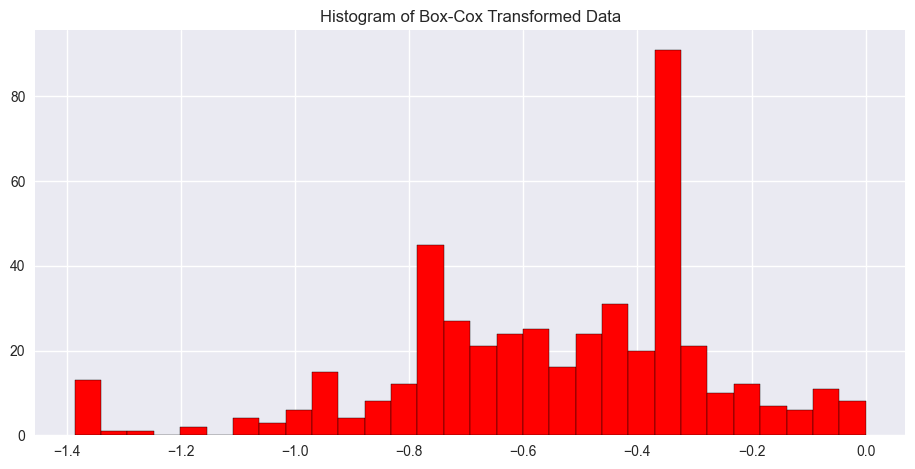

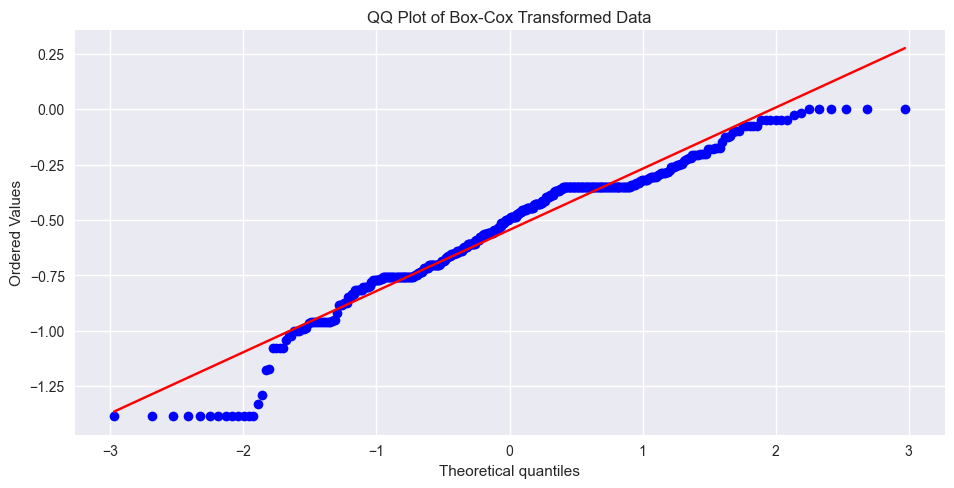


Shapiro-Wilk Test after Box-Cox Transformation:
W=0.9495673885553151, p-value=1.540404014553801e-11

Kolmogorov-Smirnov Test after Box-Cox Transformation:
KS Statistic=0.5139495811586396, p-value=2.6598715514409487e-115


In [217]:
#Reassessment after applying transformations

# Histogram and QQ plot for box cox-transformed data
plt.figure(figsize=(10, 5))
plt.hist(cust_bc, bins=30, color='red',edgecolor='black')
plt.title('Histogram of Box-Cox Transformed Data')
plt.show()
print()

cust_bc_flatten = cust_bc.flatten()
plt.figure(figsize=(10,5))
stats.probplot(cust_bc_flatten, dist="norm", plot=plt)
plt.title('QQ Plot of Box-Cox Transformed Data')
plt.show()
print()

# Shapiro-Wilk test for box cox-transformed data
shapiro_log_test = shapiro(cust_bc)
print(f'Shapiro-Wilk Test after Box-Cox Transformation:')
print(f'W={shapiro_log_test[0]}, p-value={shapiro_log_test[1]}')
print()

# Kolmogorov-Smirnov test for box cox-transformed data
ks_log_test = kstest(cust_bc, 'norm')
print(f'Kolmogorov-Smirnov Test after Box-Cox Transformation:')
print(f'KS Statistic={ks_log_test[0]}, p-value={ks_log_test[1]}')

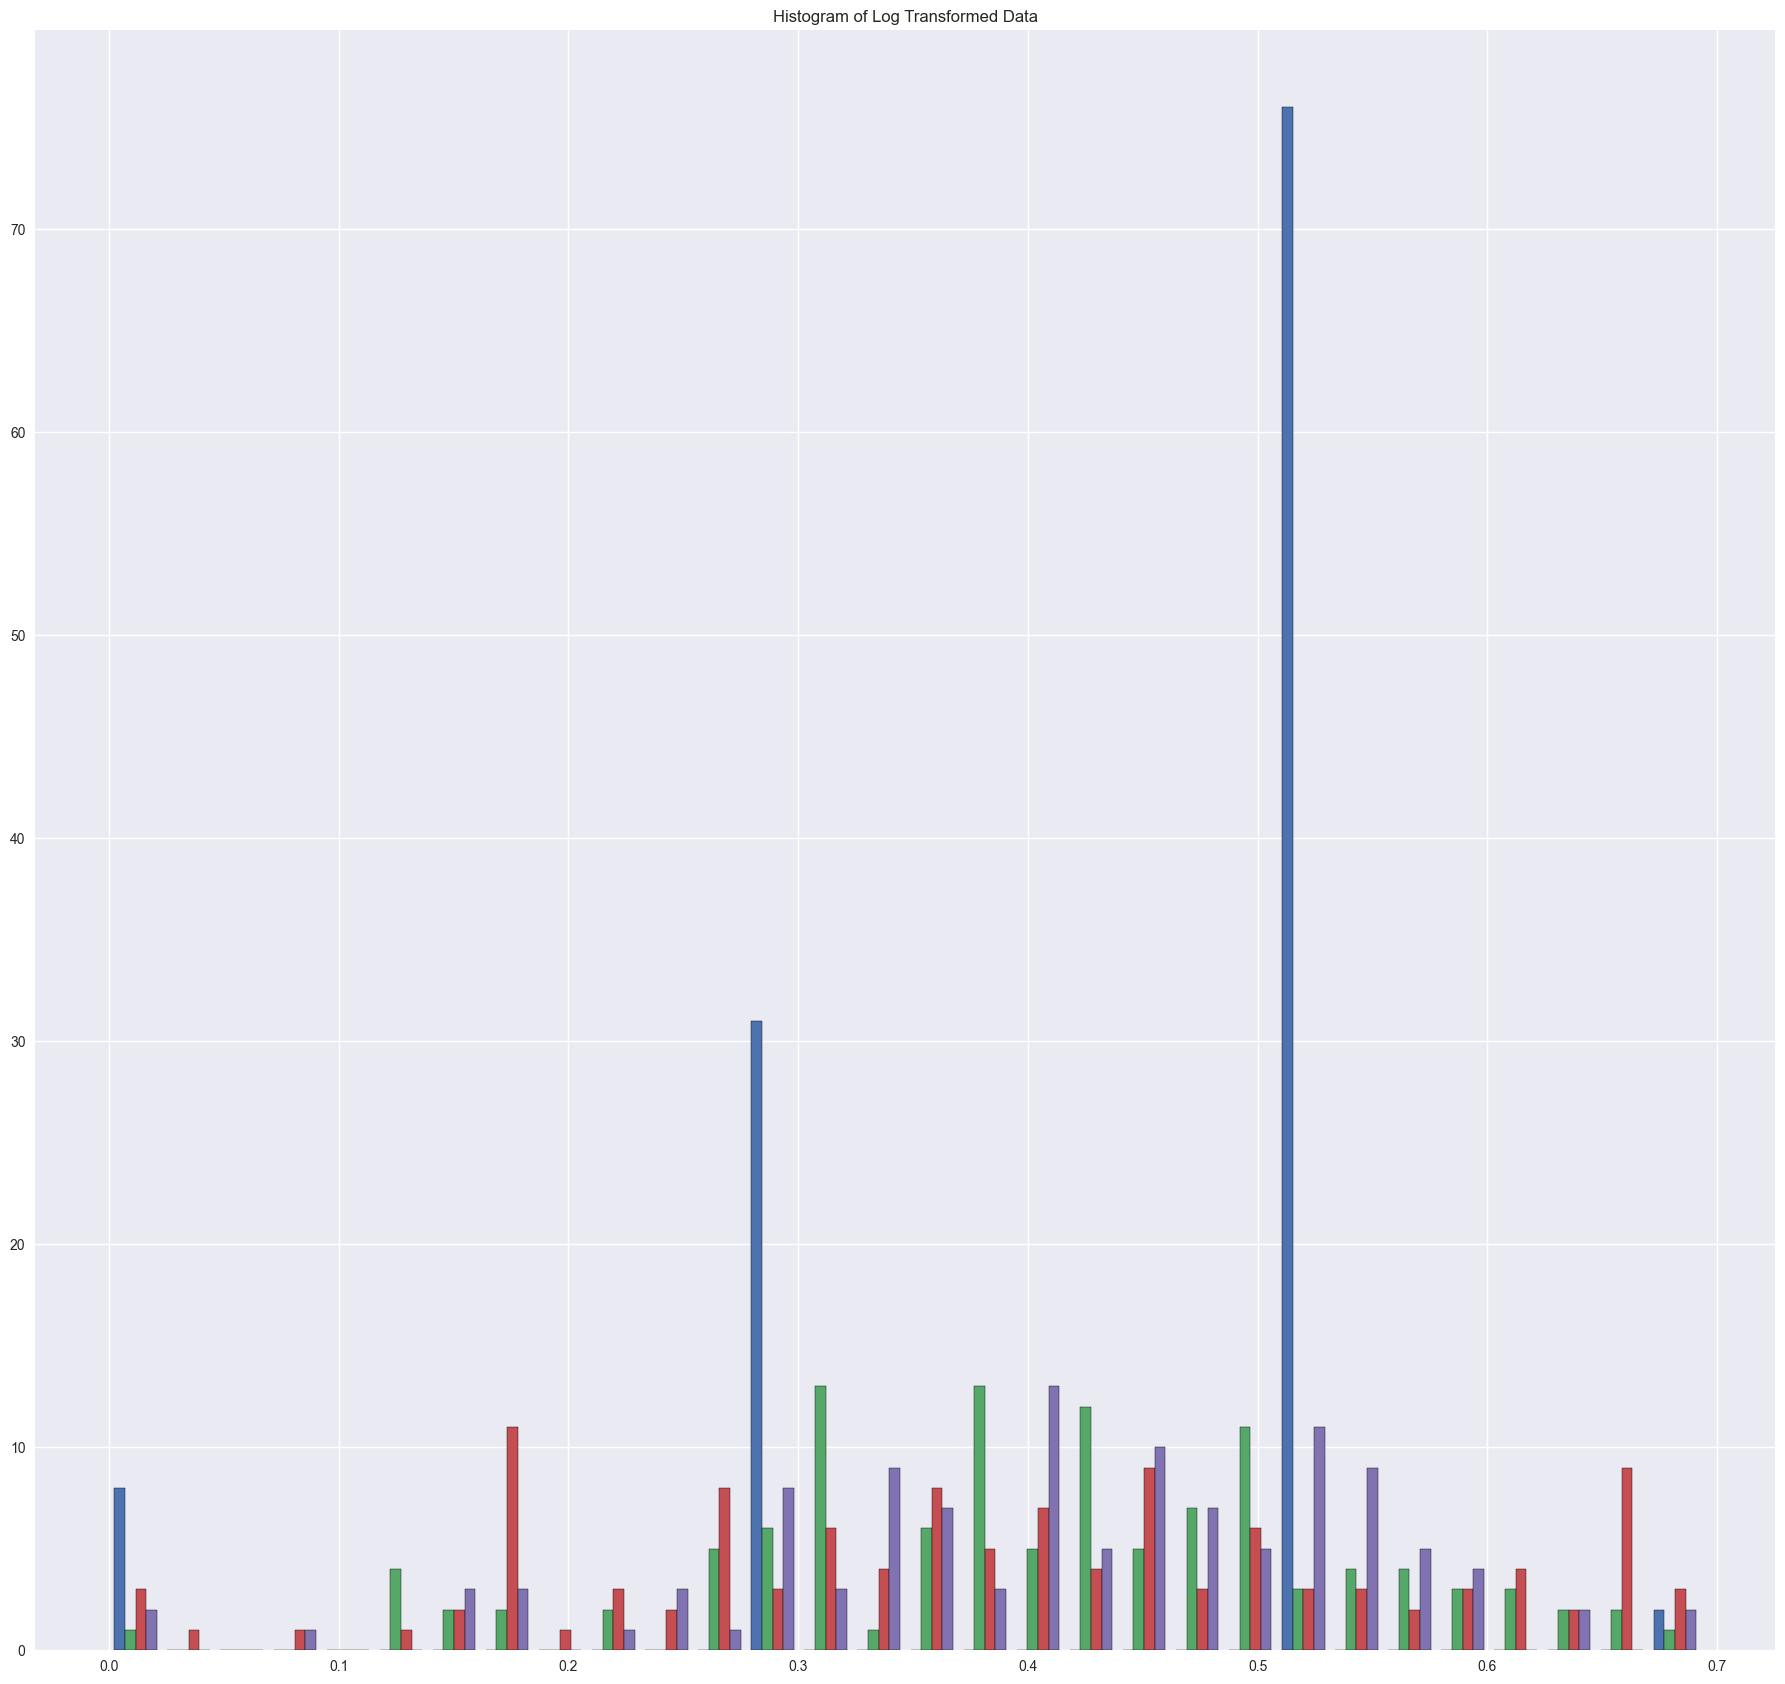

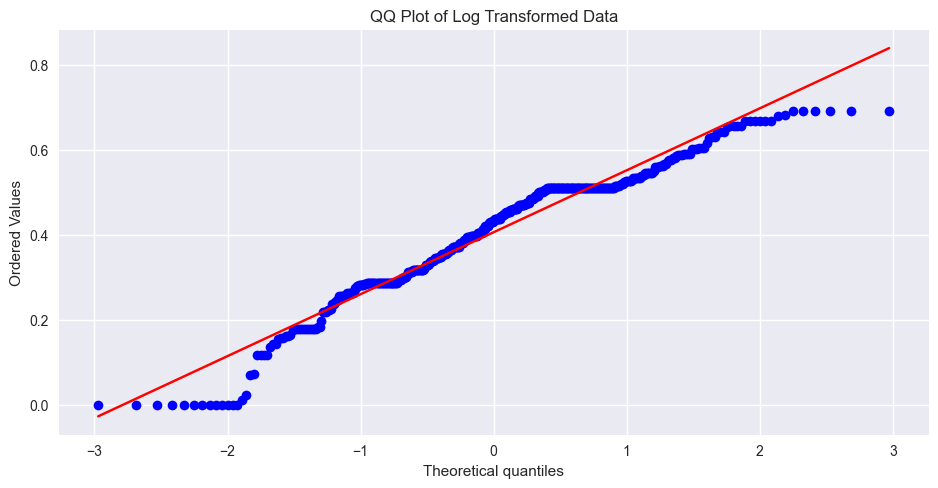


Shapiro-Wilk Test after Log Transformation:
W=0.9582917895637431, p-value=3.0575871083346034e-10

Kolmogorov-Smirnov Test after Log Transformation:
KS Statistic=[0.54482887 0.53833321 0.5115818  0.53163891], p-value=[4.36390969e-33 3.01275375e-32 6.16845590e-29 2.13380559e-31]


In [218]:
#Reassessment after applying transformations

# Histogram and QQ plot for log-transformed data
plt.figure(figsize=(20, 20))
plt.hist(cust_log, bins=30, edgecolor='black')
plt.title('Histogram of Log Transformed Data')
plt.show()
print()

cust_log_flatten = cust_log.values.flatten()
plt.figure(figsize=(10,5))
stats.probplot(cust_log_flatten, dist="norm", plot=plt)
plt.title('QQ Plot of Log Transformed Data')
plt.show()
print()

# Shapiro-Wilk test for log-transformed data
shapiro_log_test = shapiro(cust_log)
print(f'Shapiro-Wilk Test after Log Transformation:')
print(f'W={shapiro_log_test[0]}, p-value={shapiro_log_test[1]}')
print()

# Kolmogorov-Smirnov test for log-transformed data
ks_log_test = kstest(cust_log, 'norm')
print(f'Kolmogorov-Smirnov Test after Log Transformation:')
print(f'KS Statistic={ks_log_test[0]}, p-value={ks_log_test[1]}')

# 9. Linear regression

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score

## One Hot encoding

In [235]:
from sklearn.preprocessing import StandardScaler

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)


### Standard Scaling (Feature Scaling)

In [236]:
features = df_encoded.drop('Calories', axis=1)
target = df_encoded['Calories']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

In [237]:
scaled_df.head()

,Duration,Pulse,Maxpulses
0,0.602414,0.598170,-0.232863
1,0.602414,1.502046,1.201081
2,0.602414,-0.305707,0.245119
3,-0.963863,1.502046,1.487870
4,0.602414,-0.434832,-0.519652


### Linear regression

In [238]:
#Regression Equation and line generation

# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(scaled_df,
                                                target, test_size=0.2,#20 % of dataset is used for testing, rest for training
                                                random_state=42)#random state for reproducibility

In [239]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercepts
print("Coefficients:", model.coef_)
print()
print("Intercept:", model.intercept_)

Coefficients: [36.98046179 24.98480878 13.83030363]

Intercept: 315.40007439218243


In [240]:
# Use the built model to make predictions
y_pred = model.predict(X_test)

In [241]:
# Accuracy of the model
model.score(X_test,y_test)

0.4411934071004948

In [242]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 1947.7913848542364
RMSE: 44.1337896044996
MAE: 30.70857950664012
R-squared: 0.4411934071004948


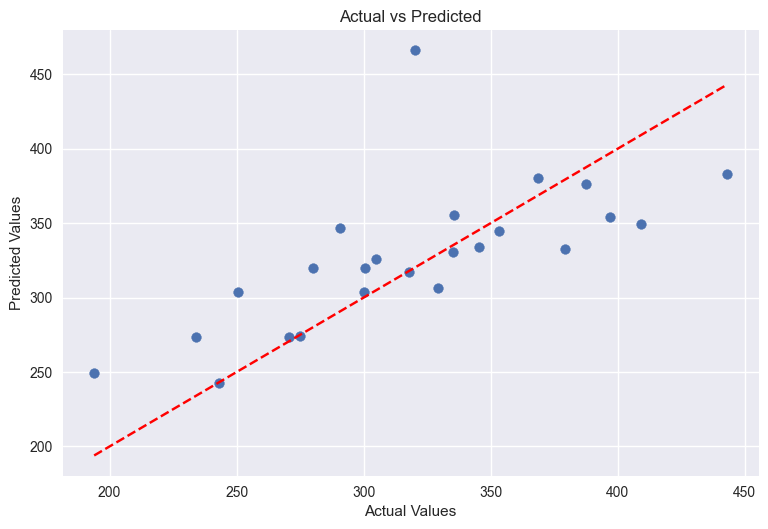

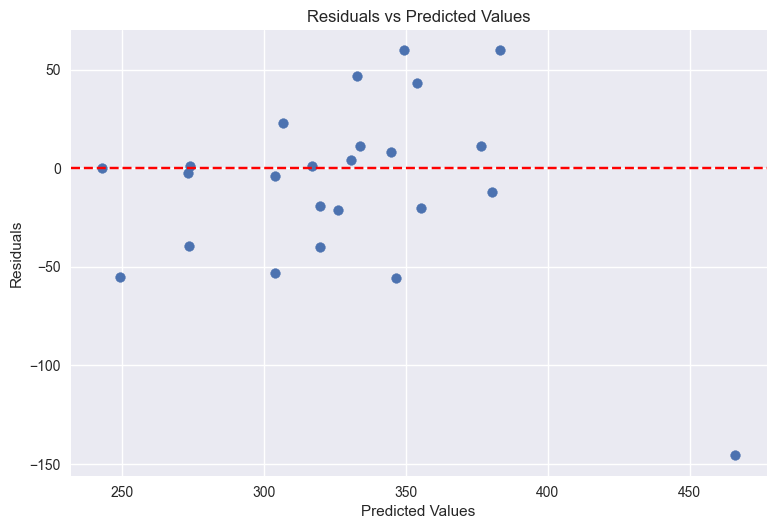

In [243]:
# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')#red)
plt.show()
print()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values');
plt.show()

In [244]:
#Can use lasso and ridge to improve performace

# Z-test